# **MID-TERM PART B**
`Paula Ramirez`
`8963215`

In this notebook, I will use  predictive models such as Gaussian Naive Bayes, Multinomial Naive Bayes, and Logistic Regression to classify data and evaluate their performance.

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


## **Gaussian and Multinominal Classifiers for Wines Dataset**

Build a model that can best predict and classify wines into 3 categories. 

The models considered are:

- Gaussian
- Multinominal 

To evaluate model performance, I will measure the accuracy. Also I will use a train-test split strategy.

### 1. Data Collection
Load and preprocessing data from sklearn

**Data Set Characteristics:**

***Number of Instances:*** 178 (50 in each of three classes)

***Number of Attributes:*** 13 numeric, predictive attributes and the class

***Attribute Information:***
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash  
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline
- class: wine Classification (target)
    - class_0
    - class_1
    - class_2


In [2]:
# Splitting data in X(independent) and Y(dependent) variables.
X, y = datasets.load_wine(return_X_y=True, as_frame=True)

#Combine X and Y to do EDA
df_wines= pd.concat([X,y.rename("target")], axis=1)

# Printing first observations
df_wines.head().round(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df_wines.shape

(178, 14)

In [4]:
df_wines.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [5]:
df_wines.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### ***FINDINGS***

The actual dataset has `178` observations and  `14` features, where class feature is the target variable.

The target variable is categorical with three classes: 0, 1, and 2. If we see the distribution, it is evident that this shows class imbalance with class 1 being the most frequent due the mean 0.93.

The features are not scaled.

### 2. Split test and train 
Using the 80%-20% approach.

In [6]:
# Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Validating the number of each dataset

In [7]:
print(f"Rows in the train set: {len(X_train)}")
print(f"Rows in the test set: {len(X_test)}")

Rows in the train set: 142
Rows in the test set: 36


### 3. Multinomial Naive Bayes 
This algorithm is based on Bayes’ Theorem, ideal for classification problems like in this case, classify the wines.

In [8]:
#*-----------Transform a positive numbers------------*
X_train_abs = np.abs(X_train)
X_test_abs = np.abs(X_test)

#*-----------Training the Multinomial Naive Bayes Model------------*
mul_model = MultinomialNB()
mul_model.fit(X_train, y_train)

#*---------------Prediction in the test dataset-------------------*
y_pred = mul_model.predict(X_test)

#*--------------------Evaluating Accuracy-------------------------*
accuracy = accuracy_score(y_test, y_pred)
print(f"Miltunomial Accuracy: {accuracy * 100:.2f}%\n")

Miltunomial Accuracy: 88.89%



> The Multinomial model requires positive numbers, so the data was converted accordingly. Multinomial Naive Bayes is designed for discrete data. In this case, since the Wine dataset contains continuous values, its performance may be limited. However the accuracy for this model was `88.89%` which is acceptable.

### 4. Gaussian Naive Bayes 
This algorithm is also ideal for classification. Based on the chemical properties, it uses continuous values to classify the wines more effectively.

In [9]:
#*-----------Training the Gaussian Naive Bayes Model------------*
gau_model = GaussianNB()
gau_model.fit(X_train, y_train)

#*---------------Prediction in the test dataset-------------------*
y_pred_gauss = gau_model.predict(X_test)

#*--------------------Evaluating Accuracy-------------------------*
accuracy_gauss = accuracy_score(y_test, y_pred_gauss)
print(f"Gaussian Accuracy: {accuracy_gauss * 100:.2f}%")

Gaussian Accuracy: 100.00%


> This Gaussian model performs well because as said before, the wine dataset contains continuous features. Due to this features fit the assumptions of the Gaussian distribution, I obtained better results `100%` indicating that the model generalized well, especially when compared to the lower performance of the Multinomial model.

### 4. Predicting some observations
I will take a few samples from the test dataset and compare the results between the two models.

In [10]:
# Creating a sample with 5 observations
samples = X_test.iloc[[15, 1, 2, 4, 28]]
labels = y_test.iloc[[15, 1, 2, 4, 28]]

pred_gau = gau_model.predict(samples)
pred_mul = mul_model.predict(np.abs(samples)) 

comparison_df = pd.DataFrame({
    "Sample Index": samples.index,
    "Real Label": labels.values,
    "GaussianNB Prediction": pred_gau,
    "MultinomialNB Prediction": pred_mul
})

comparison_df

,Sample Index,Real Label,GaussianNB Prediction,MultinomialNB Prediction
0,111,1,1,1
1,45,0,0,0
2,140,2,2,2
3,67,1,1,1
4,90,1,1,1


### 4. Conclusion

Gaussian reached an accuracy of `100%`, while Multinomial got `89%`.

From the follow confusion matrices, we can see that GaussianNB predictions are always aligned with the real labels. Confirming that Gaussian model is more suitable for continuous data like the features in the Wine dataset.

On the other hand, MultinomialNB made some classification errors, particularly in class 2, where it misclassified instances as class 0 and 1.

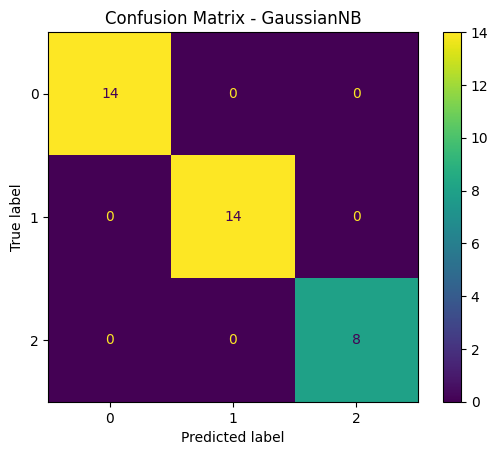

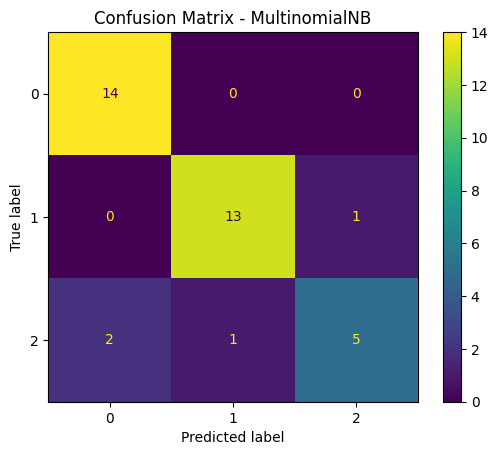

In [11]:
#  Gaussian Matrix
disp_gau = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gauss))
disp_gau.plot()
plt.title("Confusion Matrix - GaussianNB")
plt.show()

# Multinomial matrix
disp_mul = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp_mul.plot()
plt.title("Confusion Matrix - MultinomialNB")
plt.show()

## **Logistic Regression with Cross-Validation for the Flower Dataset**

Now, in this section I will build model to predict the species of Iris Flowers in the  `Flower Dataset`.

The models considered is:

Logistic Regression

To evaluate the model's performance, I apply cross-validation using cross_val_score from sklearn.

### 1. Data Collection
Load and preprocess the data using sklearn.datasets.

**Data Set Characteristics:**

***Number of Instances:*** 150 (50 in each of the three classes)

***Number of Attributes:*** 4 numeric, predictive attributes and one class label

***Attribute Information:***
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm) 
- Class: Iris flower species (target)
    - setosa
    - versicolor
    - virginica


In [12]:
# Splitting data in X(independent) and Y(dependent) variables.
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

#Combine X and Y to do EDA
df_flowers= pd.concat([X,y.rename("target")], axis=1)

# Printing first observations
df_flowers.head().round(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df_flowers.shape

(150, 5)

In [14]:
df_flowers.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [15]:
df_flowers.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### ***FINDINGS***

The actual dataset has `150` observations and  `5` features, where the target variable represents the iris flower species.

The target variable is numerical  with three classes: 0, 1, and 2. If we see the distribution, the median value is 1.0 and the standard deviation is 0.81, suggesting a slight concentration around class 1.

The features are not scaled.

### 3. Logistic Regression
This algorithm is based on the logistic function. In this case, it will be used to classify iris flowers into three categories based on their features.



In [16]:
# Defining the model.
lr_model = LogisticRegression(max_iter=200) 

### 3. Applying Cross Val Score
With this approach, the dataset is divided into 4 parts. This means the model will be trained and evaluated 5 times using different data splits. This strategy helps assess whether the model generalizes well to unseen data.

In [17]:
# Evaluating the model with cross val score

scores = cross_val_score(lr_model, X, y, cv=4)

# Showing the results
print("Cross-validation scores for each fold:", scores)
print("Average accuracy:", np.mean(scores))


Cross-validation scores for each fold: [0.97368421 0.97368421 0.94594595 1.        ]
Average accuracy: 0.9733285917496444


> By using the `cross_val_score strategy` with `cv=4`, the dataset is divided into 4 parts. The model is trained and evaluated 4 times, each time using a different fold as the test set. This allows us to measure the accuracy as an evaluation metric for each fold.



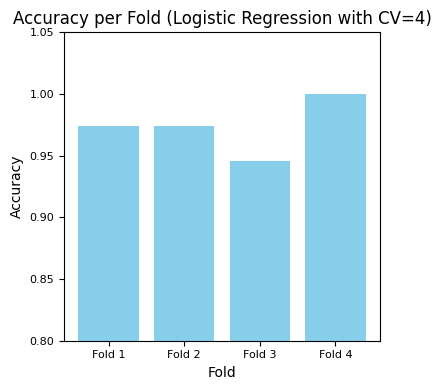

In [18]:
#  Plottin to sow accuracy
plt.figure(figsize=(4, 4))
plt.bar(range(1, 5), scores, color='skyblue')
plt.ylim(0.8, 1.05)
plt.xticks(range(1, 5), [f'Fold {i}' for i in range(1, 5)], size=8)
plt.yticks(size=8)
plt.title('Accuracy per Fold (Logistic Regression with CV=4)')
plt.xlabel('Fold', size=10)
plt.ylabel('Accuracy', size=10)
plt.tight_layout()
plt.show()

**Conclusion**

The logistic regression model showed high accuracy across in all folds during cross-validation, this means that the model performs reliably on the Iris dataset. 
The low variation in accuracy scores further shows its stability.

***Reference:*** 

GeeksforGeeks. (n.d.). Multinomial Naive Bayes. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/multinomial-naive-bayes/

**Paula Ramirez**
`Student ID 8963215`